In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AAPL.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df['Increase_Decrease'] = np.where(df['volume'].shift(-1) > df['volume'],'Increase','Decrease')
df['Buy_Sell_on_Open'] = np.where(df['open'].shift(-1) > df['open'],1,0)
df['Buy_Sell'] = np.where(df['adjClose'].shift(-1) > df['adjClose'],1,0)
df['Returns'] = df['adjClose'].pct_change()
df = df.dropna()

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0,Increase,0,0,-0.002007
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0,Decrease,0,1,-0.011383
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0,Increase,0,0,0.001957
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0,Decrease,1,1,-0.004405
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0,Increase,0,0,0.001231


<Axes: ylabel='Frequency'>

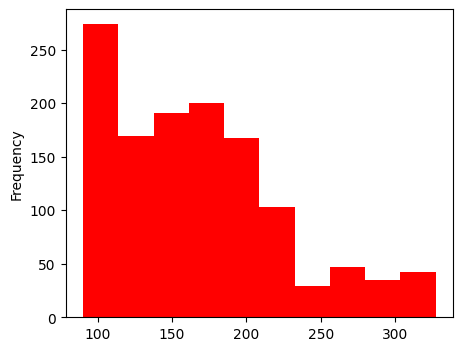

In [ ]:
df['close'].plot(kind="hist",color='red', figsize=(5,4))

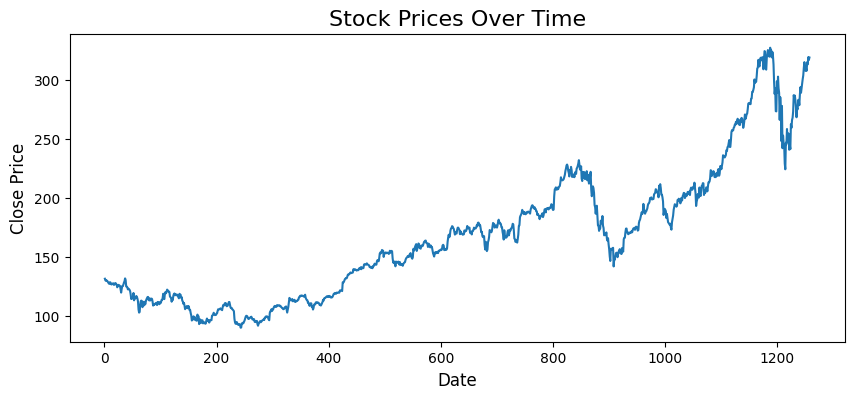

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the lineplot with explicit x and y
sns.lineplot(x=df.index, y=df['close'], ax=ax)

# Set labels and title for better readability
ax.set_title("Stock Prices Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Close Price", fontsize=12)

# Show the plot
plt.show()


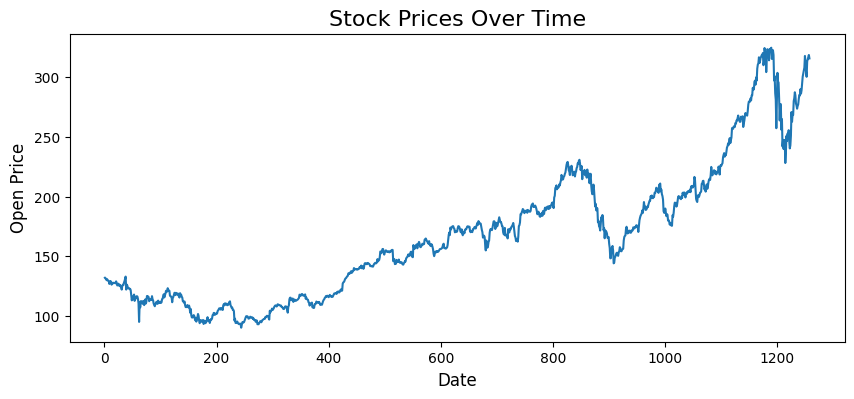

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the lineplot with explicit x and y
sns.lineplot(x=df.index, y=df['open'], ax=ax)

# Set labels and title for better readability
ax.set_title("Stock Prices Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Open Price", fontsize=12)

# Show the plot
plt.show()

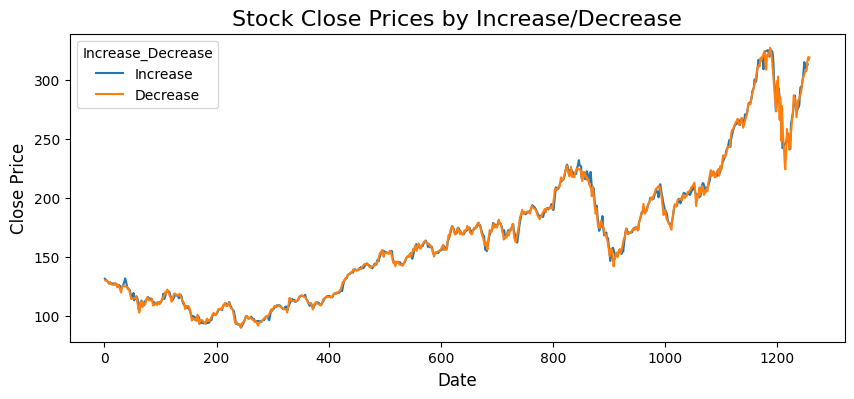

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 4))  # Set figure size directly in `plt.subplots`

# Create a lineplot
sns.lineplot(x=df.index, y="close", hue="Increase_Decrease", data=df, ax=ax)

# Set plot title and labels
ax.set_title("Stock Close Prices by Increase/Decrease", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Close Price", fontsize=12)

# Show the plot
plt.show()

In [ ]:
df['Increase_Decrease'].value_counts()

,count
Increase_Decrease,
Decrease,651
Increase,606


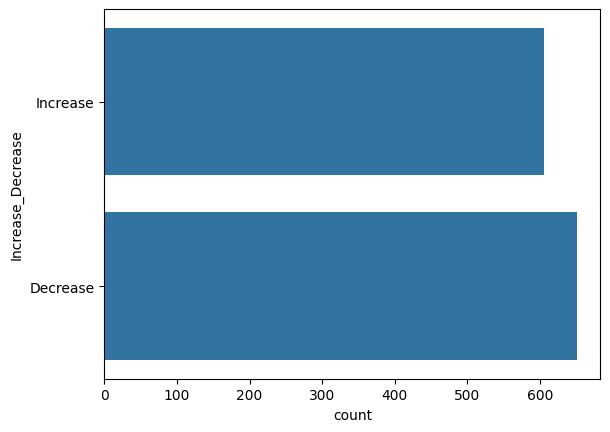

In [ ]:
ax = sns.countplot(df['Increase_Decrease'],label="Count")

<Axes: xlabel='Increase_Decrease', ylabel='close'>

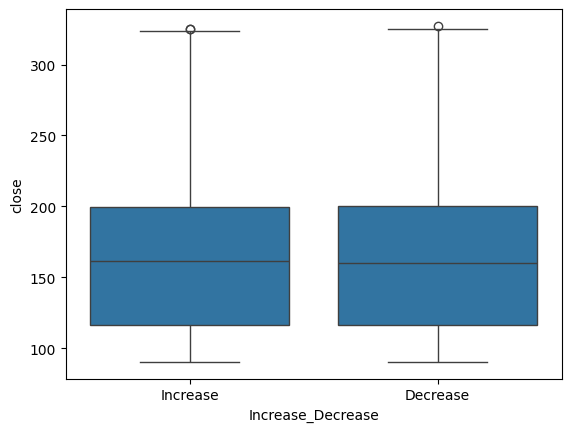

In [ ]:
# Boxplot
sns.boxplot(x='Increase_Decrease', y=df['close'], data=df)

<ipython-input-74-c28404ed2632>:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='Increase_Decrease', y=df['close'], data=df, jitter=True, edgecolor="gray")


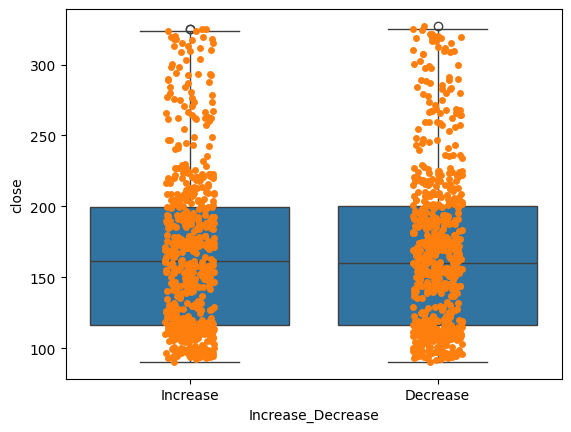

In [ ]:
ax = sns.boxplot(x='Increase_Decrease', y=df['close'], data=df)
ax = sns.stripplot(x='Increase_Decrease', y=df['close'], data=df, jitter=True, edgecolor="gray")

In [ ]:
df

,open,high,low,close
0,130.34,132.260,130.0500,132.045
1,131.86,131.950,131.1000,131.780
2,131.23,131.450,129.9000,130.280
3,131.20,131.390,130.0500,130.535
4,129.86,130.655,129.3200,129.960
...,...,...,...,...
1253,313.17,316.500,310.3241,314.960
1254,315.03,318.520,313.0100,313.140
1255,316.68,319.520,316.2000,319.230
1256,318.66,320.890,315.8700,316.850


In [ ]:
df1=df.reset_index()['close']
df1

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


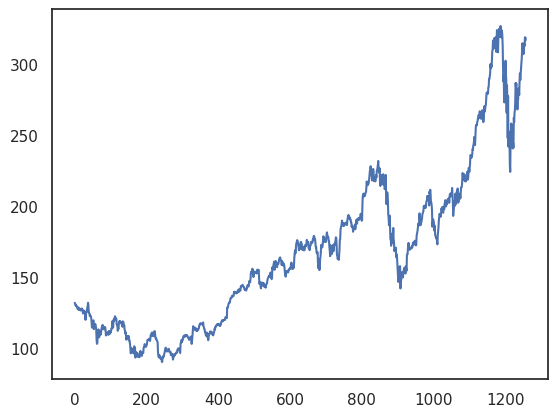

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - loss: 0.0357 - val_loss: 0.0538
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 8.3522e-04 - val_loss: 0.0050
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 6.8045e-04 - val_loss: 0.0050
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - loss: 6.2744e-04 - val_loss: 0.0041
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 6.4138e-04 - val_loss: 0.0038
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 6.2213e-04 - val_loss: 0.0036
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 6.0147e-04 - val_loss: 0.0037
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 5.7080e-04 - val_loss: 0.0035
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 6.1037e-04 - val_loss: 0.0035
Epoch 12/

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.75054519475864

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

232.6679105164028

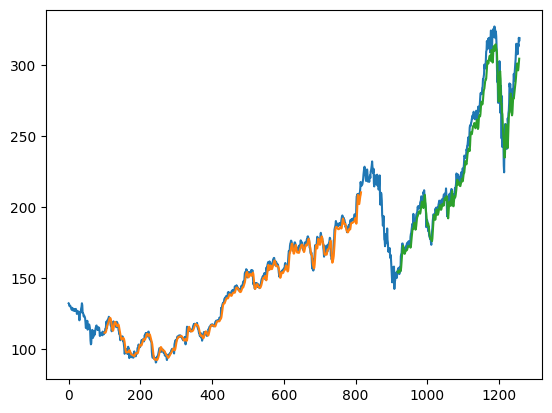

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.91163945]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

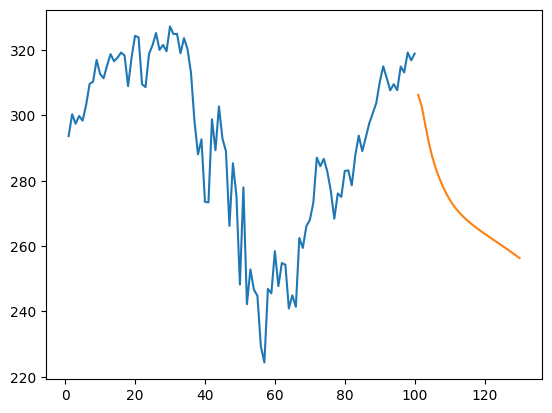

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

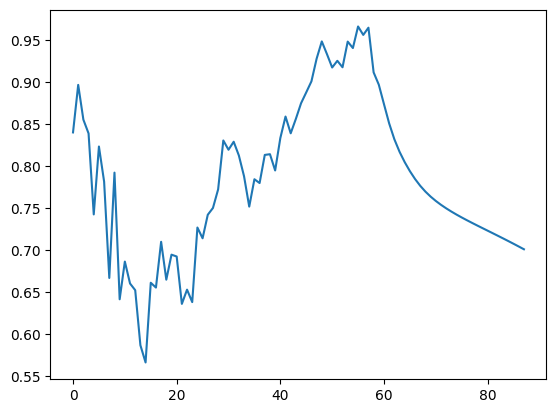

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

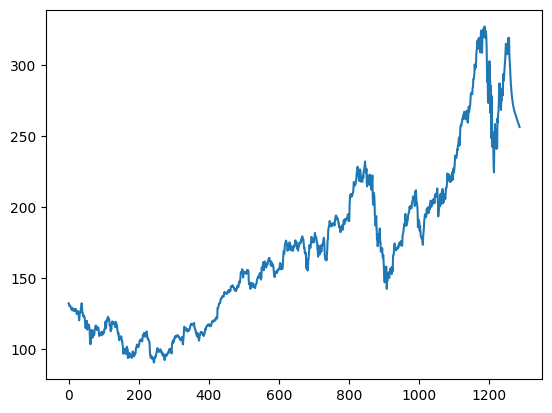

In [ ]:
plt.plot(df3)